# Data Structures Timing, and Performance

In this notebook I'm going to explore the performance of different data structures in 2 parts. In Part 1 I'm going to see how the time it takes to perform a membership check on lists, Part 2 check on sets and dicts. A "membership check" is what you do when you write code like:

```python
someList = [1,2,3]
if 3 in someList:
    # we just checked someList for membership
    # of the element 3
```

# Part 1: Lists

Let's explore the following two questions:

1) When an element IS in a list, does the location of that element (near the beginning vs near the end) impact the time it takes to perform a membership check?

2) When an element IS NOT in a list, does the size of the list impact the time it takes to perform a membership check?

In [85]:
# import dependencies
import time
import random
from matplotlib import pyplot as plt

In [86]:
# Let's do a couple of test cases
L = [1,2,3]
2 in L

True

In [87]:
L = [1,2,3]
4 in L

False

## Question 1
> Does position in list impact the time it takes to perform a membership test?

First we're going to need to figure out how to do these timings...

In [88]:
# let's make a small list to begin with
L = list(range(10))
print(L)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [89]:
# now let's time how long it takes to check for 
# membership of the very first element (0)...

startTime = time.clock()

0 in L

endTime =   time.clock()
milliseconds = (endTime - startTime) * 1000

print(milliseconds, "milliseconds to find 0 in list")

0.06299999999725969 milliseconds to find 0 in list


In [90]:
# Run the above code a few times. You should notice that the time
# can change quite a bit. What we actually want is to conduct
# this experiment a bunch of times and find the average. 


L = list(range(1000)) # use a bigger list
element = 500         # look in the middle of the list
numTrials = 1000      # perform experiment many times

start = time.clock()
for _ in range(numTrials):
    element in L
end = time.clock()
avgMillis = (end-start) * 1000/numTrials
print("on average, it took", avgMillis, "ms per membership test")

on average, it took 0.016204000000001884 ms per membership test


In [91]:
# That's a useful bit of code! 
# Let's generalize it and turn it into a reusable function

def avgCheck(element, target_list, N=20):
    start = time.clock()
    for _ in range(N):
        element in target_list
    end = time.clock()
    return (end-start)*1000 / N

avgMillis = avgCheck(500, list(range(1000)))
print("on average, it took", avgMillis, "ms per membership test")

on average, it took 0.008149999999673696 ms per membership test


In [92]:
# now we can compare time to lookup low numbers (near the 
# beginning of the list) vs higher numbers (near the end).

# Let's use a really big list this time
L = list(range(1000000))

# Now make three separate timings...
beginning = avgCheck(1000, L)
middle    = avgCheck(500000, L)
end       = avgCheck(999999, L)

print("beginning: ", beginning)
print("middle:    ", middle)
print("end:       ", end)

beginning:  0.030800000000041905
middle:     9.161200000000136
end:        18.766749999999988


So this is really interesting! There's clearly a relationship. Let's see if we can dig deeper though and use a scatter plot showing average time vs position

In [93]:
# Making a scatter plot of position in list (X-axis)
# vs. average time to find element (y-axis)

listSize = 100000
L = list(range(listSize))

# check between start and end in increments of 10000. This will
# be our X axis too!
positions = list(range(0, listSize, 10000))

# use list comprehension to generate Y-axis data!
millis = [avgCheck(pos, L) for pos in positions]

# first, let's look at the raw data
print("positions checked:", positions)
print("average millis:   ", millis)

positions checked: [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000]
average millis:    [0.00029999999995311555, 0.2195000000000391, 0.41984999999975514, 0.5303500000000128, 0.7829499999999712, 1.1725499999997169, 1.1942999999998705, 1.3263999999999498, 1.3035999999999603, 1.495750000000129]


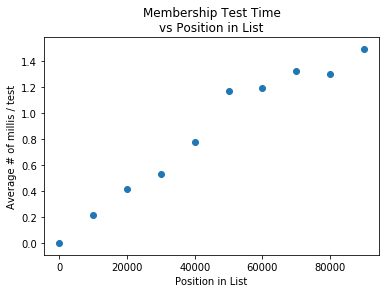

In [94]:
# now let's make the scatter plot!
X = positions 
Y = millis
plt.scatter(X, Y)
plt.title("Membership Test Time\nvs Position in List")
plt.xlabel("Position in List")
plt.ylabel("Average # of millis / test")
plt.show()

### Answer to Question 1
Yes! Where an element is in a list **definitely** impacts how long it takes to discover that the element exists in the list!

Elements near the beginning of a list are found very quickly. Elements near the end of the list take longer. 

## Question 2 
> Does the size of a list impact the time it takes to test for membership of elements when they are NOT in the list?

In [95]:
# Let's jump right into writing a function

def avgCheckFalse(listSize, numTrials=20):
    # prepare list and nonexistent element
    L = list(range(listSize))
    element = -1
    
    # start the timer
    start = time.clock()
    
    # repeat membership test num_trials times
    for _ in range(numTrials):
        element in L
    
    # stop the timer
    end = time.clock()
    
    # do the math and return the result
    avgMillis = (end-start) * 1000 / numTrials
    return avgMillis

In [96]:
# Let's check lists of different sizes
small  = 10000
medium = 100000
large  = 1000000

small  = avgCheckFalse(small)
medium = avgCheckFalse(medium)
large  = avgCheckFalse(large)

print("small: ", small)
print("medium:", medium)
print("large: ", large)

small:  0.1304000000001082
medium: 2.381549999999777
large:  20.299900000000193


Once again, we see that there IS a relationship... 

Let's make another scatter plot.

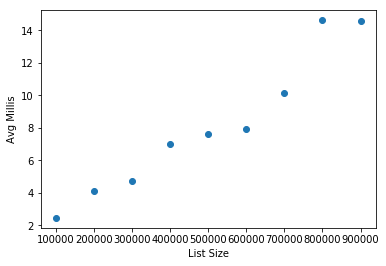

In [97]:
sizes = list(range(100000, 1000000, 100000))
times = [avgCheckFalse(s) for s in sizes]
plt.scatter(sizes, times)
plt.xlabel("List Size")
plt.ylabel("Avg Millis")
plt.show()

### Answer to Question 2
Yes! When checking for membership of an element in a list, it takes longer to figure out an element **doesn't** exist in that list when the list is big.

# Part 2: Sets and Dictionaries

### Feel the *slowness*

We just *saw* the slowness of lists. As a list gets bigger it takes longer and longer to perform membership tests.

But you can *feel* the slowness too. I'm going to compare how long it takes to run the next two cells.

In [98]:
# SMALL list test

small = list(range(10)) # ten element list of integers
falseElement = -1
numTrials = 5000

start = time.clock()
for _ in range(numTrials):
    falseElement in small

end = time.clock()
millis = (end-start) * 1000
print("Execution complete! That took", millis, "milliseconds")

Execution complete! That took 1.2279999999975644 milliseconds


In [99]:
# BIG list test

big = list(range(100000)) # 100K element list of integers
falseElement = -1
numTrials = 5000

start = time.clock()
for _ in range(numTrials):
    falseElement in big

end = time.clock()
millis = (end-start) * 1000
print("Execution complete! That took", millis, "milliseconds")

Execution complete! That took 7115.2689999999975 milliseconds


That was **boring**

Waiting for code to execute (even if it only takes a few seconds) is annoying... and depending what you are testing, building or analyzing could be harmful

Fortunatly, we can speed things up **a lot** by choosing the right data structure.

### Feel the *speed*

Next I'll do the EXACT same thing as the code cells above except they use `set` instead of `list` in that first line.

In [100]:
# SMALL set test

smallSet = set(range(10)) # ten element list of integers
falseElement = -1
numTrials = 5000

start = time.clock()
for _ in range(numTrials):
    falseElement in smallSet

end = time.clock()
millis = (end-start) * 1000
print("Execution complete! That took", millis, "milliseconds")

Execution complete! That took 0.6470000000007303 milliseconds


### Drum roll please!

Remember how *painfully slow* the big list was? Well hold on to your seat!

In [101]:
# BIG set test

bigSet = set(range(100000)) # 100K element list of integers
falseElement = -1
numTrials = 5000

start = time.clock()
for _ in range(numTrials):
    falseElement in bigSet

end = time.clock()
millis = (end-start) * 1000
print("Execution complete! That took", millis, "milliseconds")

Execution complete! That took 0.8179999999953225 milliseconds


In [102]:
def testSpeed(dataType, size, N=50):
    if dataType != dict:
        structure = dataType(range(size))
    else:
        structure = {num: "value" for num in range(size)}
    falseElement = -1
    
    start = time.clock()
    for _ in range(N):
        falseElement in structure
    end = time.clock()
    
    millis = (end-start) * 1000
    return millis    

In [103]:
# set test
testSpeed(set, 100000, N=1000)

0.11800000000050659

In [104]:
# list test
testSpeed(list, 100000, N=1000)

1653.4240000000011

In [105]:
# dictionary test
testSpeed(dict, 100000, N=1000)

0.07200000000295859

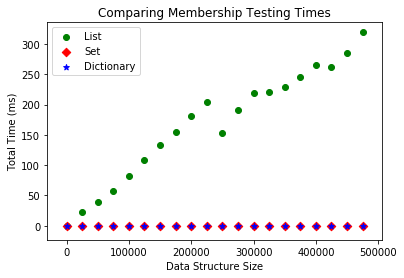

In [106]:
sizes = list(range(0, 500000, 25000))
listSpeed = [testSpeed(list, size) for size in sizes]
setSpeed  = [testSpeed(set,  size) for size in sizes]
dictSpeed = [testSpeed(dict, size) for size in sizes]

plt.scatter(sizes, listSpeed, c='g', marker="o") #green circle
plt.scatter(sizes, setSpeed,  c='r', marker="D") #red diamond
plt.scatter(sizes, dictSpeed, c='b', marker="*") #blue star

plt.xlabel("Data Structure Size")
plt.ylabel("Total Time (ms)")
plt.legend(["List", "Set", "Dictionary"])
plt.title("Comparing Membership Testing Times")
plt.show()

The time it takes to test for membership in a list "scales linearly" with the size of the list and constant time for sets and dictionaries. Simply put if you double the size of the list you double the amount of time it takes to test for membership of an element (on average).